In [1]:
import pickle
import math
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, variance, stdev

In [2]:
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n

In [3]:
pat = re.compile(r"\s+")
f = open("/Users/1zd/quantumjets/pythiaEvents/Pythia8Results.dat", 'r')

g = list(zip(*[ pat.sub(" ",x.strip()).split() for x in f]))

npart = np.array([ int(x) for x in g[0]])
sph = np.array([ float(x) for x in g[1]]) #thrust calculated using sphericity as seed axis
thr = np.array([ float(x) for x in g[2]])
niter = np.array([ int(x) for x in g[3]])

In [4]:
pat2 = re.compile(r"\s+")
fd2 = open("/Users/1zd/quantumjets/pythiaEvents/DWaveResults_tune_10k.dat", 'r')

g2 = list(zip(*[ pat2.sub(" ",x.strip()).split() for x in fd2]))
dw10k = np.array([ float(x) for x in g2[0]])

In [5]:
pat3 = re.compile(r"\s+")
fd3 = open("/Users/1zd/quantumjets/pythiaEvents/DWaveResults_tune_5k.dat", 'r')

g3 = list(zip(*[ pat3.sub(" ",x.strip()).split() for x in fd3]))
dw5k = np.array([ float(x) for x in g3[0]])

In [12]:
pat4 = re.compile(r"\s+")
fd4 = open("/Users/1zd/quantumjets/pythiaEvents/DWaveResults_tune_1k_3.dat", 'r')

g4 = list(zip(*[ pat4.sub(" ",x.strip()).split() for x in fd4]))
dw1k = np.array([ float(x) for x in g4[0]])

In [15]:
pat5 = re.compile(r"\s+")
fd5 = open("/Users/1zd/quantumjets/pythiaEvents/DWaveResults_tune_100.dat", 'r')

g5 = list(zip(*[ pat5.sub(" ",x.strip()).split() for x in fd5]))
dw100 = np.array([ float(x) for x in g5[0]])

In [20]:
pat6 = re.compile(r"\s+")
fd6 = open("/Users/1zd/quantumjets/pythiaEvents/DWaveResults_tune_10.dat", 'r')

g6 = list(zip(*[ pat6.sub(" ",x.strip()).split() for x in fd6]))
dw10 = np.array([ float(x) for x in g6[0]])

In [21]:
for i in range(len(thr)):
    if(truncate(dw10k[i],4)>thr[i]):
        dw10k[i] = thr[i]
    if(truncate(dw5k[i],4)>thr[i]):
        dw5k[i] = thr[i]
    if(truncate(dw1k[i],4)>thr[i]):
        dw1k[i] = thr[i]
    if(truncate(dw100[i],4)>thr[i]):
        dw100[i] = thr[i]
    if(truncate(dw10[i],4)>thr[i]):
        dw10[i] = thr[i]

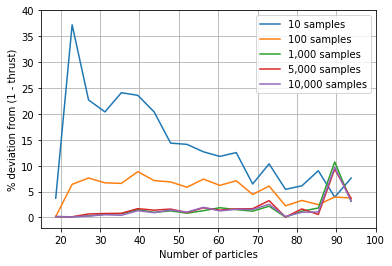

In [26]:
from scipy.stats import binned_statistic

diff_dw10k = []
diff_dw5k = []
diff_dw1k = []
diff_dw100 = []
diff_dw10 = []

for i in range(len(dw10k)):
    diff_dw10k.append(100.*((1.0 - truncate(dw10k[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw5k.append(100.*((1.0 - truncate(dw5k[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw1k.append(100.*((1.0 - truncate(dw1k[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw100.append(100.*((1.0 - truncate(dw100[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))
    diff_dw10.append(100.*((1.0 - truncate(dw10[i], 4)) - (1.0 - truncate(thr[i],4)) )/(1.0 - truncate(thr[i],4)))

fig, ax = plt.subplots()


s, edges, _ = binned_statistic(npart, diff_dw10k, statistic='mean', bins=np.linspace(0,100, 25))
s2, edges2, _ = binned_statistic(npart, diff_dw5k, statistic='mean', bins=np.linspace(0,100, 25))
s3, edges3, _ = binned_statistic(npart, diff_dw1k, statistic='mean', bins=np.linspace(0,100, 25))
s4, edges4, _ = binned_statistic(npart, diff_dw100, statistic='mean', bins=np.linspace(0,100, 25))
s5, edges5, _ = binned_statistic(npart, diff_dw10, statistic='mean', bins=np.linspace(0,100, 25))

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]

ys2 = np.repeat(s2,2)
xs2 = np.repeat(edges2,2)[1:-1]

ys3 = np.repeat(s3,2)
xs3 = np.repeat(edges3,2)[1:-1]

ys4 = np.repeat(s4,2)
xs4 = np.repeat(edges4,2)[1:-1]

ys5 = np.repeat(s5,2)
xs5 = np.repeat(edges5,2)[1:-1]

ax1 = plt.subplot(111)

ax1.plot(edges5[:-1]+np.diff(edges5)/2, s5,  zorder=3, label='10 samples')
ax1.plot(edges4[:-1]+np.diff(edges4)/2, s4,  zorder=3, label='100 samples')
ax1.plot(edges3[:-1]+np.diff(edges3)/2, s3,  zorder=3, label='1,000 samples')
ax1.plot(edges2[:-1]+np.diff(edges2)/2, s2,  zorder=3, label='5,000 samples')
ax1.plot(edges[:-1]+np.diff(edges)/2, s, zorder=3, label='10,000 samples')


ax1.set_xlabel('Number of particles')
ax1.set_ylabel('% deviation from (1 - thrust)')
#ax1.legend(loc='right')

ax1.grid()
ax1.set_xlim([15,100])
ax1.set_ylim([-2,40])

#plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(loc='upper right')

plt.savefig('plots/num_reads_scant_vs_npart.png', bbox_inches="tight")
plt.show()